# Регрессия

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = r'C:\Users\whati\OneDrive\Рабочий стол\Jup\Projects_Analytics\regression\twitchdata.csv'

In [173]:
df = pd.read_csv(path, sep=';', index_col='Channel')

In [112]:
df.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Channel,,,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


### NA значения по каждому признаку

In [59]:
na_counts = df.isna().sum()

formatted_na_counts = "Количество NA значений по признакам:\n\n"
for feature, count in na_counts.items():
    formatted_na_counts += f"{feature}: {count}\n"

print(formatted_na_counts)

Количество NA значений по признакам:

Watch time(Minutes): 0
Stream time(minutes): 0
Peak viewers: 0
Average viewers: 0
Followers: 0
Followers gained: 0
Views gained: 0
Partnered: 0
Mature: 0
Language: 0



## Исследовательский анализ данных

In [9]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, xQcOW to Remx
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Watch time(Minutes)   1000 non-null   int64 
 1   Stream time(minutes)  1000 non-null   int64 
 2   Peak viewers          1000 non-null   int64 
 3   Average viewers       1000 non-null   int64 
 4   Followers             1000 non-null   int64 
 5   Followers gained      1000 non-null   int64 
 6   Views gained          1000 non-null   int64 
 7   Partnered             1000 non-null   bool  
 8   Mature                1000 non-null   bool  
 9   Language              1000 non-null   object
dtypes: bool(2), int64(7), object(1)
memory usage: 72.3+ KB


7 числовых признаков и 3 категориальных

### Категориальные признаки

In [15]:
output_text = "Сгруппированные значения категориальных признаков:\n\n"

for feature in grouped_categorical_data:
    output_text += f"Признак: {feature}\n"
    output_text += grouped_categorical_data[feature].to_string()
    output_text += "\n\n"

print(output_text)

Сгруппированные значения категориальных признаков:

Признак: Partnered
True     978
False     22

Признак: Mature
False    770
True     230

Признак: Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Greek           1
Swedish         1
Finnish         1
Other           1
Slovak          1




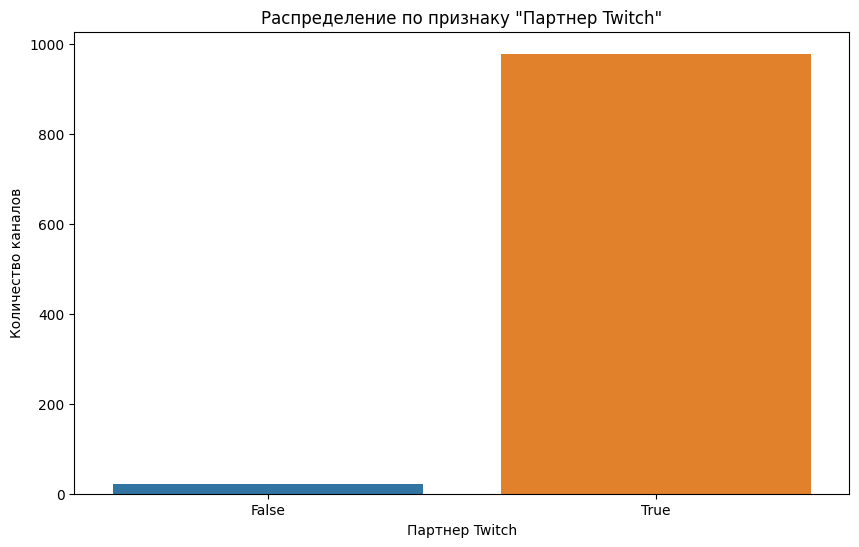

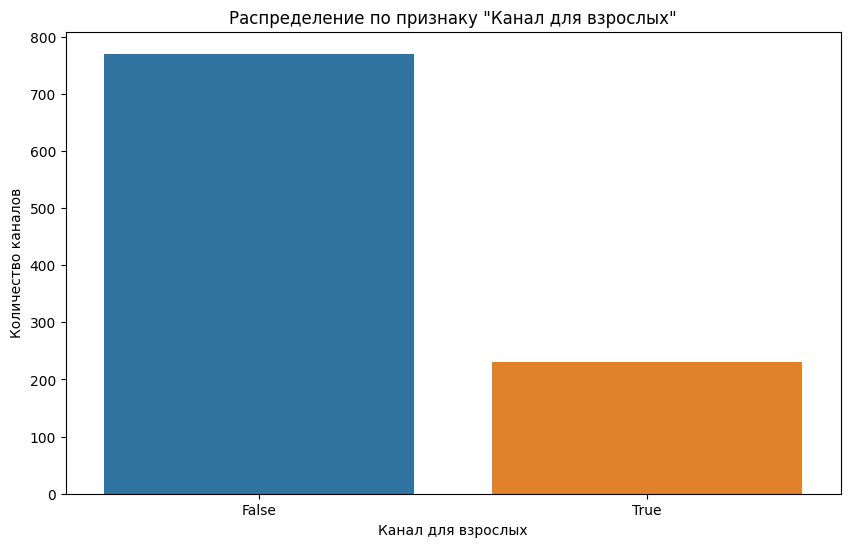

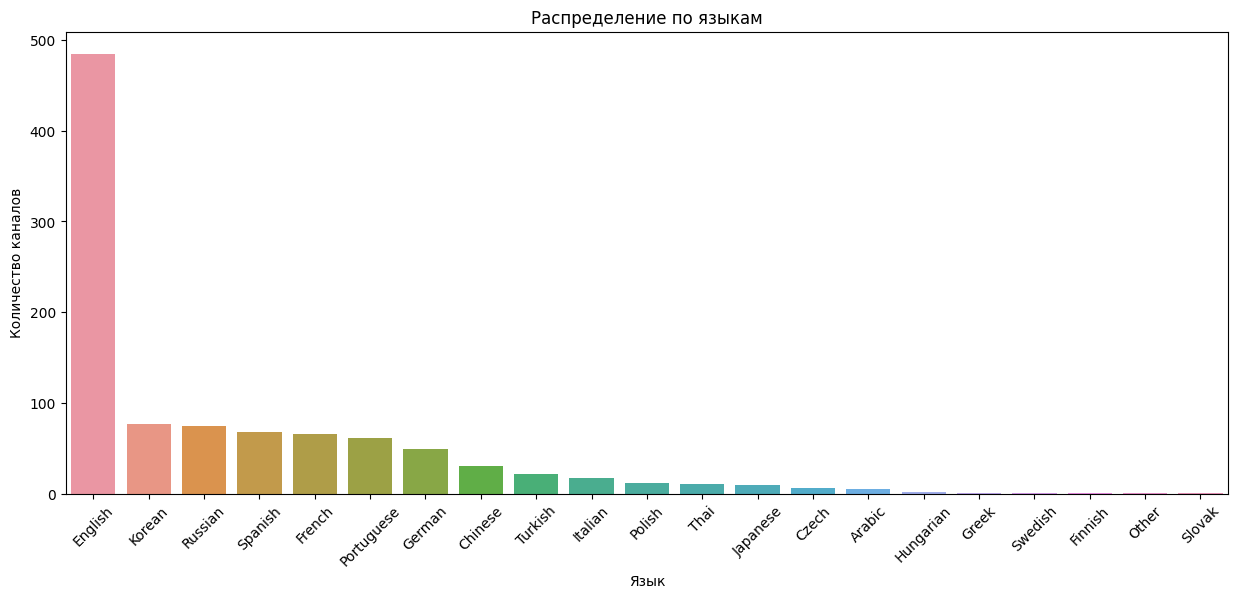

In [18]:
# Partnered
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Partnered')
plt.title('Распределение по признаку "Партнер Twitch"')
plt.xlabel('Партнер Twitch')
plt.ylabel('Количество каналов')
plt.show()

# Mature
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mature')
plt.title('Распределение по признаку "Канал для взрослых"')
plt.xlabel('Канал для взрослых')
plt.ylabel('Количество каналов')
plt.show()

# Language
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Language', order = df['Language'].value_counts().index)
plt.title('Распределение по языкам')
plt.xlabel('Язык')
plt.ylabel('Количество каналов')
plt.xticks(rotation=45)
plt.show()

### Гистограммы распределений для числовых признаков

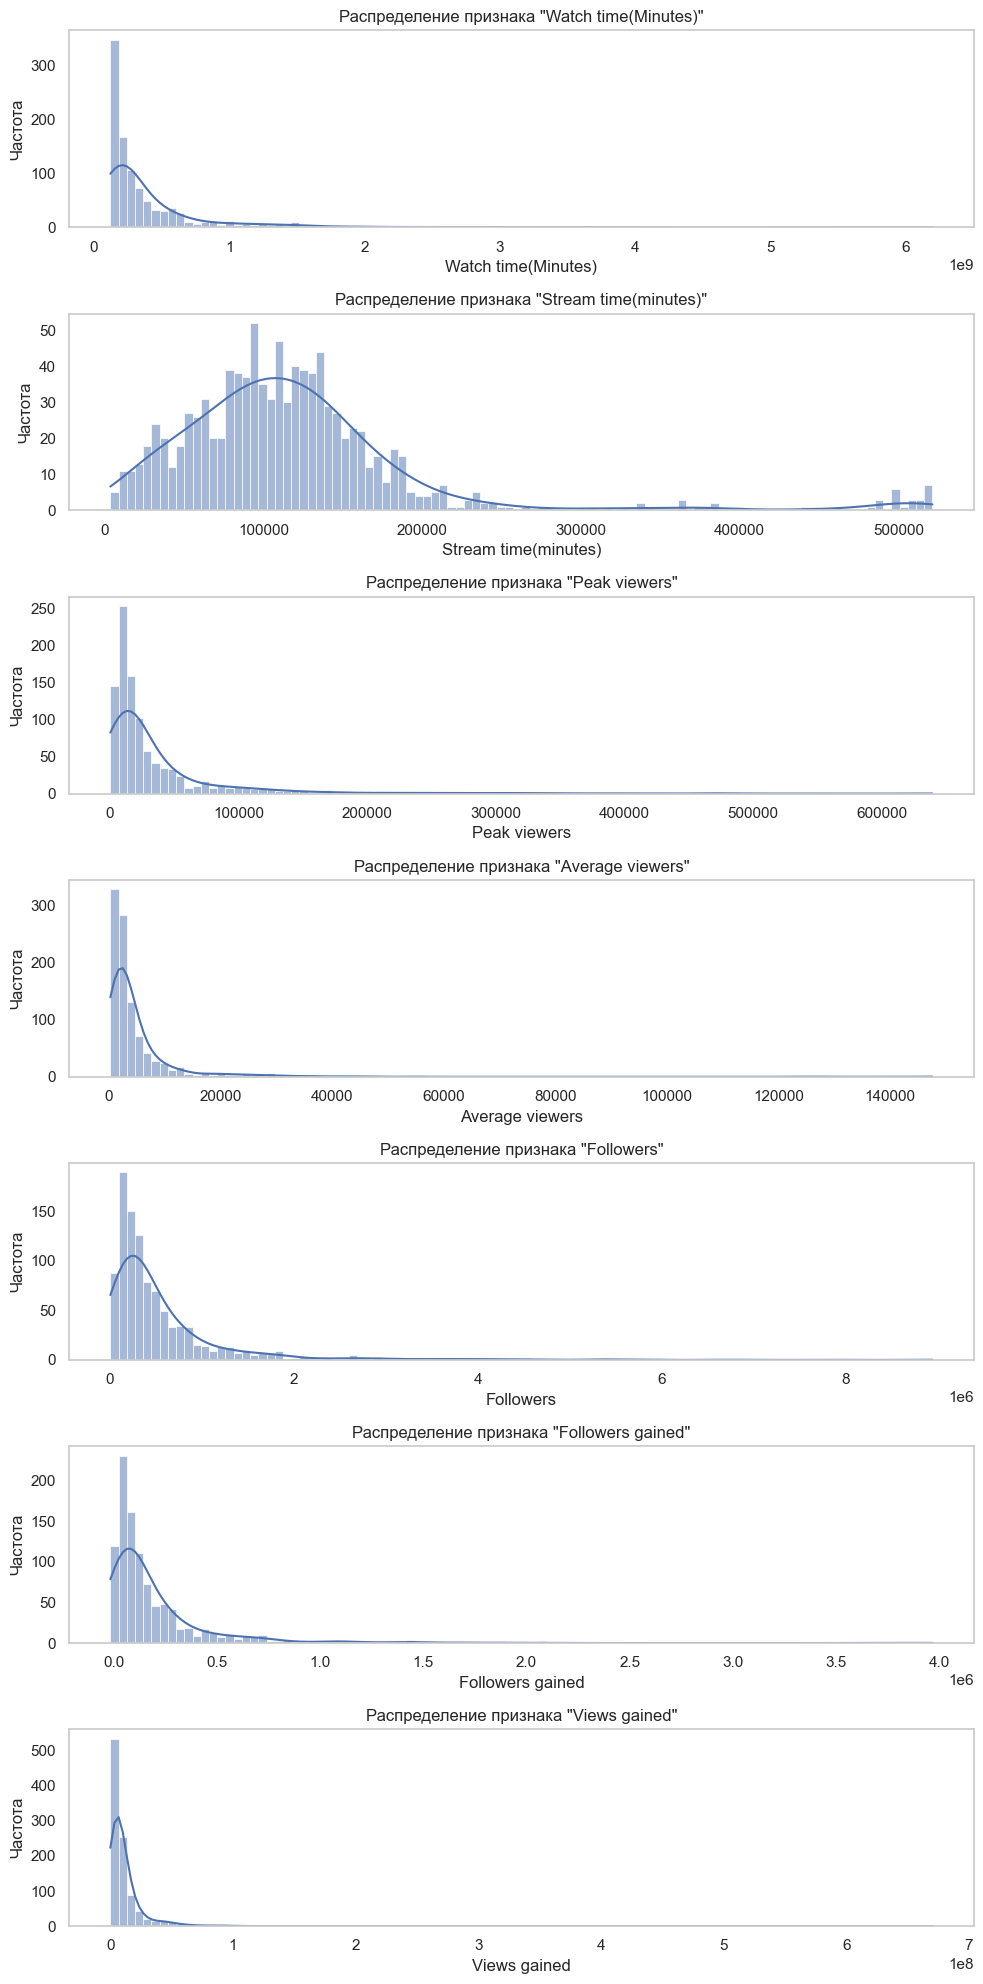

In [27]:
numeric_features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 
                    'Followers', 'Followers gained', 'Views gained']

fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 20))

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], bins=100, ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение признака "{feature}"')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].grid(False)  

plt.tight_layout()
plt.show()

### Логарифмирование

C:\Users\whati\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


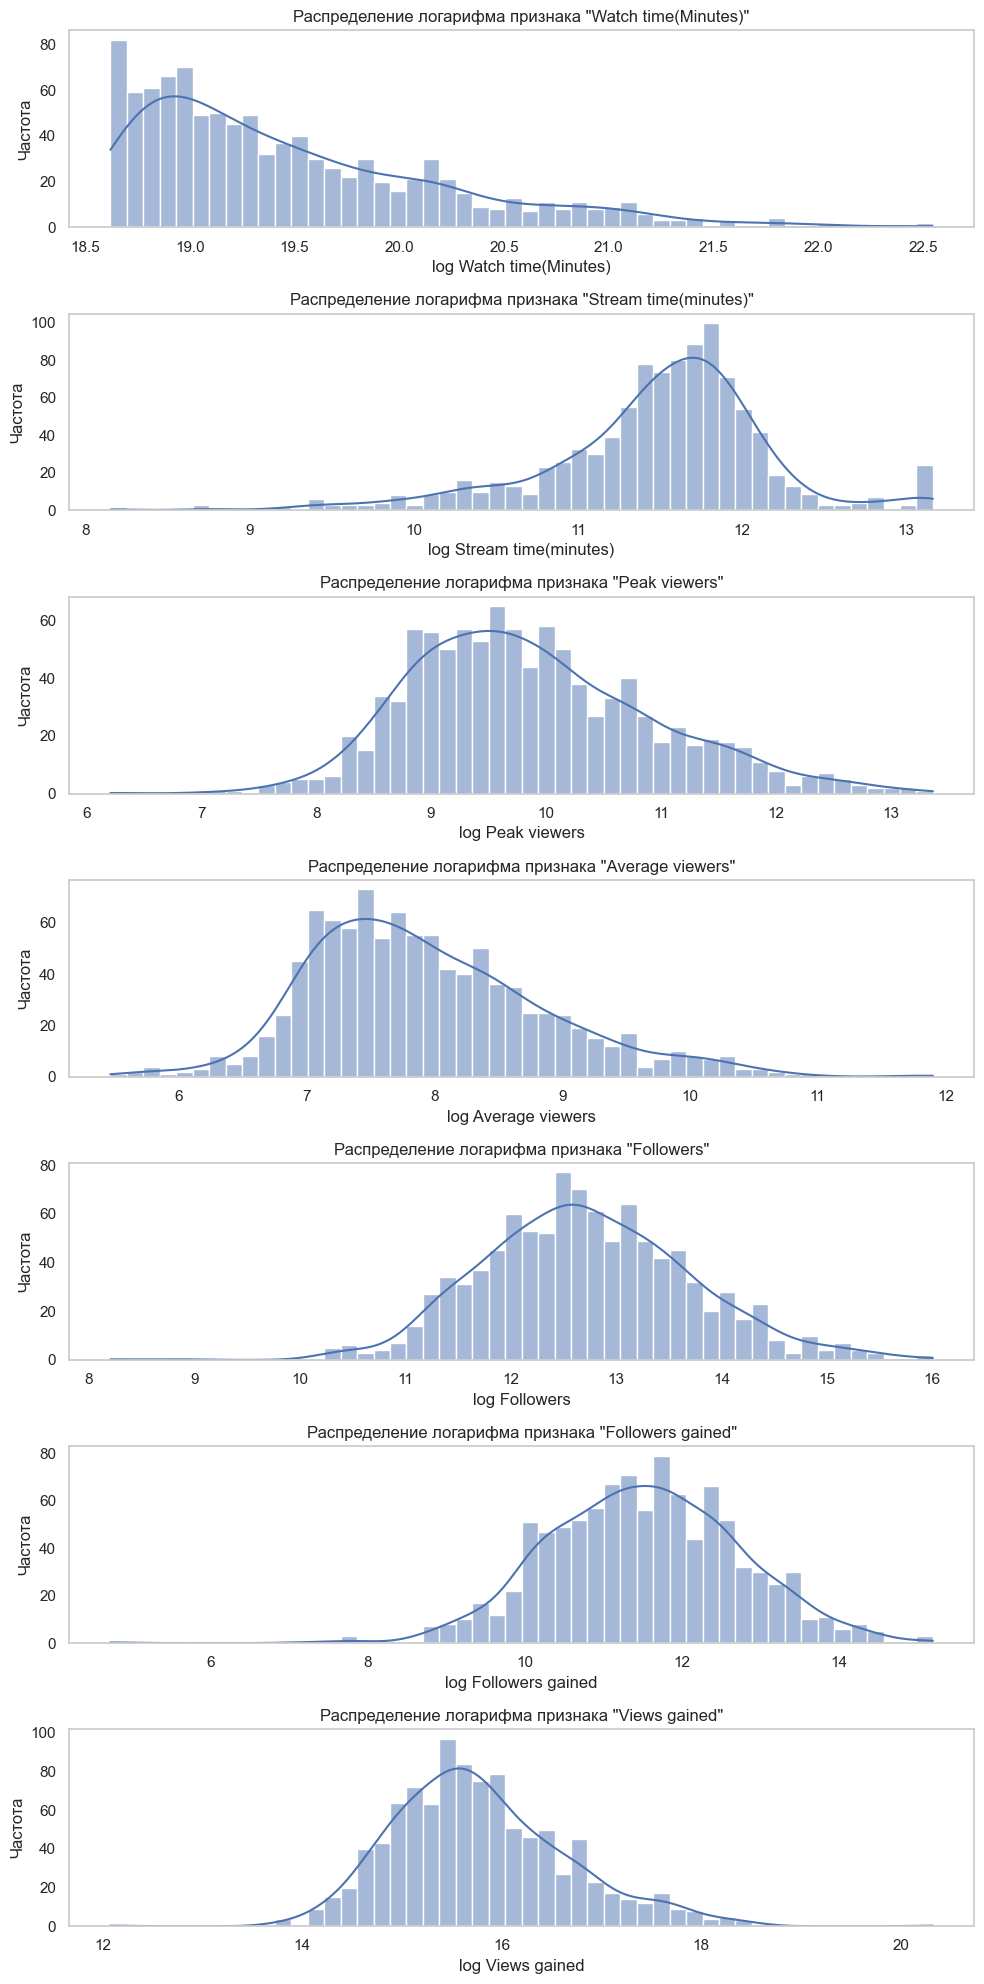

In [60]:
log_transformed_features = df.copy()
for feature in numeric_features:
        log_transformed_features[feature] = np.log1p(df[feature])

fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 20))

for i, feature in enumerate(numeric_features):
    sns.histplot(log_transformed_features[feature], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение логарифма признака "{feature}"')
    axes[i].set_xlabel(f'log {feature}')
    axes[i].set_ylabel('Частота')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Проверка на нормальность тестом Шапиро-Уилка

In [37]:
from scipy.stats import shapiro

shapiro_results = {}
for feature in numeric_features:
    # Тест применяется к данным, если количество уникальных значений больше 3 (ограничение теста Шапиро-Уилка)
    if len(log_transformed_features[feature].unique()) > 3:
        shapiro_result = shapiro(log_transformed_features[feature].dropna())
        shapiro_results[feature] = shapiro_result

formatted_results = "Результаты теста Шапиро-Уилка на нормальность:\n\n"
for feature, (statistic, p_value) in shapiro_results.items():
    formatted_results += f"{feature}:\n"
    formatted_results += f"  Статистика: {statistic:.4f}\n"
    formatted_results += f"  P-значение: {p_value:.2e}\n\n"

print(formatted_results)

Результаты теста Шапиро-Уилка на нормальность:

Watch time(Minutes):
  Статистика: 0.8922
  P-значение: 7.47e-26

Stream time(minutes):
  Статистика: 0.9383
  P-значение: 6.04e-20

Peak viewers:
  Статистика: 0.9800
  P-значение: 1.76e-10

Average viewers:
  Статистика: 0.9686
  P-значение: 7.14e-14

Followers:
  Статистика: 0.9935
  P-значение: 2.26e-04

Followers gained:
  Статистика: 0.9933
  P-значение: 1.93e-04

Views gained:
  Статистика: 0.9760
  P-значение: 8.83e-12




Для всех признаков p-значение < 0.05, => нулевая гипотеза о нормальности распределения отклоняется. Это означает, что даже после логарифмического преобразования, данные не имеют нормального распределения

### Pair-plot

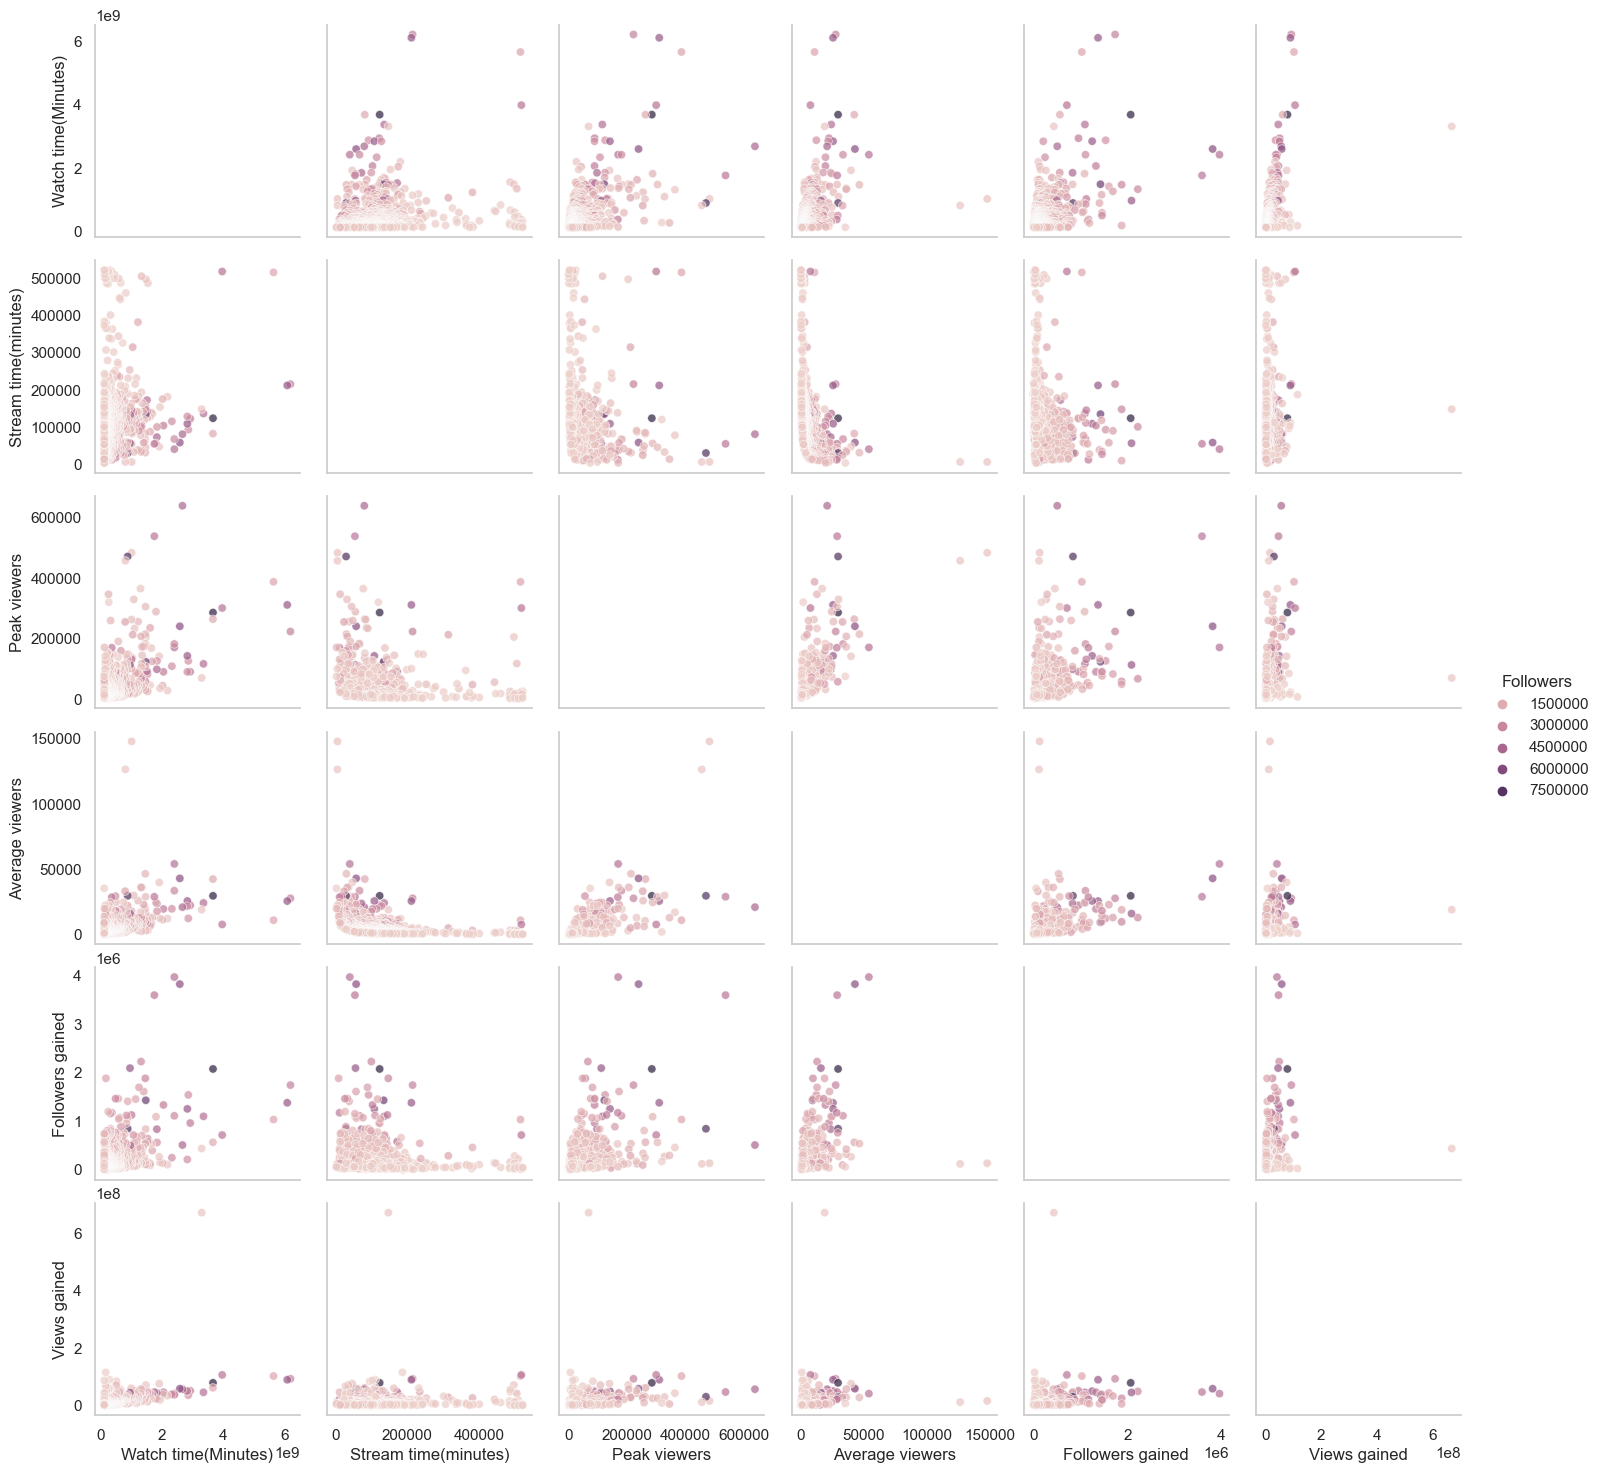

In [49]:
pair_plot = sns.pairplot(df, vars=numeric_features_without_followers, hue='Followers', plot_kws={'alpha': 0.7})

for ax in pair_plot.axes.flatten():
    ax.grid(False)

plt.show()

### Corr-plot

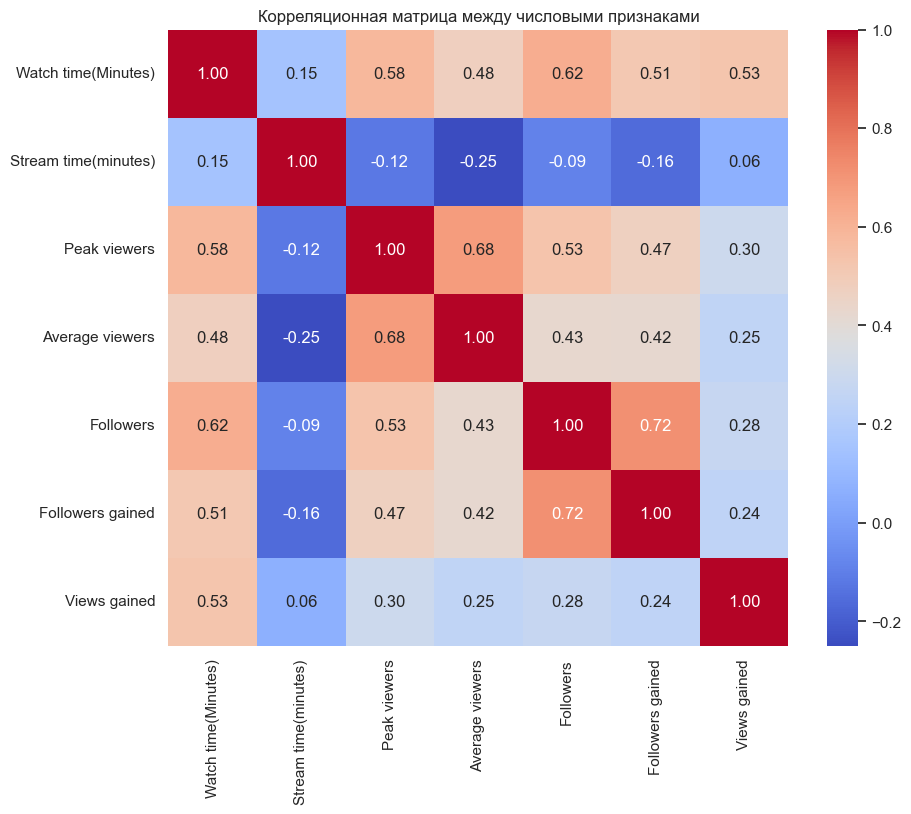

In [56]:
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица между числовыми признаками')
plt.show()

### Стандартизация и one-hot-endcoding

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [209]:
df_reset = df.reset_index()

In [198]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'bool']).columns

In [366]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
])

In [367]:
# Создание пайплайна и применение его к данным
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
stand = pipeline.fit_transform(df_reset)

In [368]:
# Получение новых названий столбцов после one-hot-encoding
new_categorical_features = (pipeline.named_steps['preprocessor']
                            .named_transformers_['cat']
                            .get_feature_names(input_features=categorical_features))

In [369]:
# Объединение всех названий столбцов
all_columns = numeric_features.tolist() + new_categorical_features.tolist()

In [370]:
stand_df = pd.DataFrame(stand, columns=all_columns)

In [371]:
stand_df.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered_False,Partnered_True,Mature_False,...,Language_Korean,Language_Other,Language_Polish,Language_Portuguese,Language_Russian,Language_Slovak,Language_Spanish,Language_Swedish,Language_Thai,Language_Turkish
0,10.517197,1.110172,3.079665,2.714371,3.328616,4.501309,3.268698,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.327004,1.070269,4.544030,2.465124,5.895577,3.428071,3.134896,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.513174,4.626141,5.809985,0.733178,1.489508,2.408464,3.653335,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.465498,4.654969,4.371132,0.347118,4.197450,1.467187,3.811423,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.920650,0.036854,4.123455,2.937580,10.408873,5.483267,2.704764,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
stand_df = stand_df.drop('Followers', axis=1)

In [373]:
stand_df['Followers'] = df_reset['Followers']

In [374]:
stand_df.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers gained,Views gained,Partnered_False,Partnered_True,Mature_False,Mature_True,...,Language_Other,Language_Polish,Language_Portuguese,Language_Russian,Language_Slovak,Language_Spanish,Language_Swedish,Language_Thai,Language_Turkish,Followers
0,10.517197,1.110172,3.079665,2.714371,4.501309,3.268698,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3246298
1,10.327004,1.070269,4.544030,2.465124,3.428071,3.134896,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5310163
2,9.513174,4.626141,5.809985,0.733178,2.408464,3.653335,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1767635
3,6.465498,4.654969,4.371132,0.347118,1.467187,3.811423,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3944850
4,5.920650,0.036854,4.123455,2.937580,5.483267,2.704764,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8938903


### Box-plot

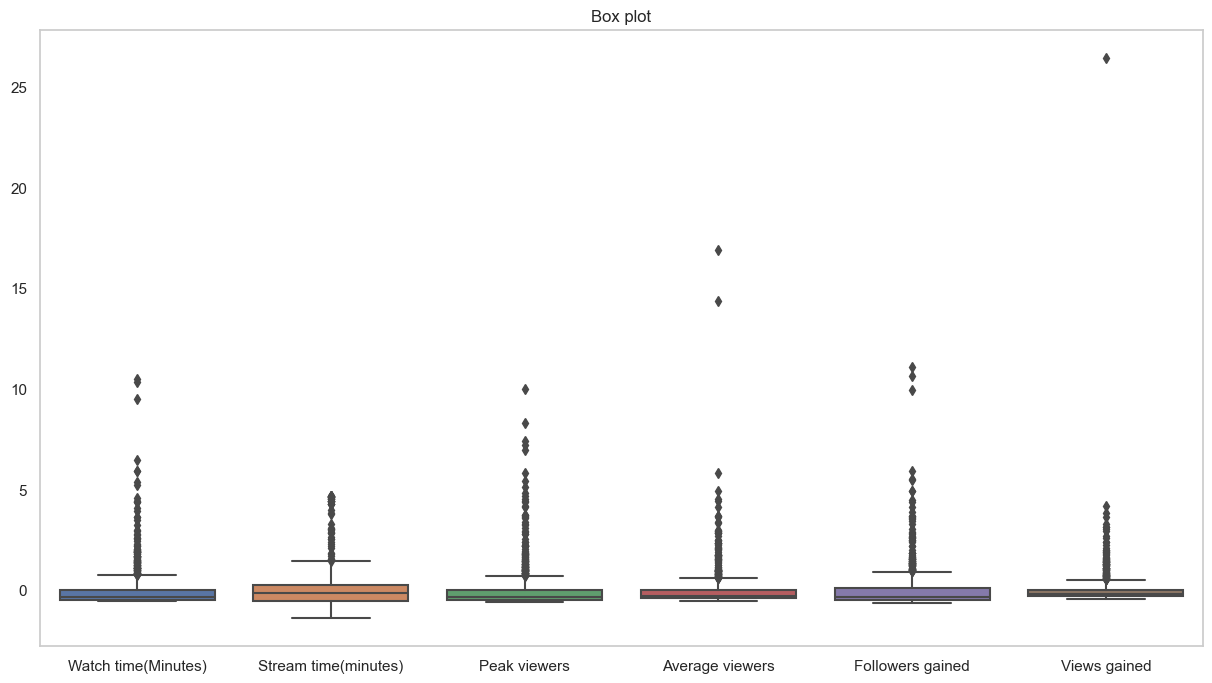

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features_for_plot = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
                             'Average viewers', 'Followers gained', 'Views gained']
numeric_data_for_plot = stand_df[numeric_features_for_plot]

plt.figure(figsize=(15, 8)) 
sns.boxplot(data=numeric_data_for_plot)
plt.title('Box plot')
plt.gca().grid(False)
plt.show()

### Удаление выбросов

In [376]:
outlier_criteria = (stand_df.drop('Followers', axis=1) > 15).any(axis=1)
count_outliers = outlier_criteria.sum()
count_outliers

2

In [377]:
stand_df = stand_df[~outlier_criteria]

## Линейная регрессия 

In [399]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [400]:
X = stand_df.drop('Followers', axis=1)
y = stand_df['Followers']

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Добавление константы для расчета (intercept)
X_with_constant = sm.add_constant(X_train)

# Создание модели OLS 
model = sm.OLS(y_train, X_with_constant)

# Обучение модели
results = model.fit()

# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Followers   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     48.66
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.43e-149
Time:                        06:28:50   Log-Likelihood:                -11615.
No. Observations:                 798   AIC:                         2.329e+04
Df Residuals:                     769   BIC:                         2.342e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.928e+05 

Модель в целом значима

In [401]:
# Список значимых признаков
significant_features = [
    'Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
    'Followers gained', 'Partnered_True','Mature_False', 
    'Mature_True', 'Language_English'
]

# Удаление незначимых признаков из X_train
X_train_significant = X_train[significant_features]

In [402]:
X_with_constant = sm.add_constant(X_train_significant)
model = sm.OLS(list(y_train), X_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          5.64e-166
Time:                        06:28:54   Log-Likelihood:                -11625.
No. Observations:                 798   AIC:                         2.327e+04
Df Residuals:                     790   BIC:                         2.330e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.726e+05 

In [404]:
# Удаление незначимых признаков из X_test
X_test_significant = X_test[significant_features]

In [407]:
# Добавление константы к тестовому набору данных
X_test_with_constant = sm.add_constant(X_test_significant)

# Предсказания модели
y_pred = results.predict(X_test_with_constant)

### Расчёт метрик

In [408]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Расчет MAPE 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# Средняя абсолютная ошибка
mae = mean_absolute_error(y_test, y_pred)
# Среднеквадратическая ошибка
mse = mean_squared_error(y_test, y_pred)
# Корень из среднеквадратической ошибки
rmse = mean_squared_error(y_test, y_pred, squared=False)
# Коэффициент детерминации R^2
r2 = r2_score(y_test, y_pred)

print(f"Средняя процентная ошибка (MAPE): {mape:.2f}%")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратической ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя процентная ошибка (MAPE): 75.57%
Средняя абсолютная ошибка (MAE): 237636.17
Среднеквадратическая ошибка (MSE): 132996024041.03
Корень из среднеквадратической ошибки (RMSE): 364686.20
Коэффициент детерминации (R^2): 0.66


## Проверка предпосылок

DW≈2, автокорреляци отсутствует

### Гистограмма остатков

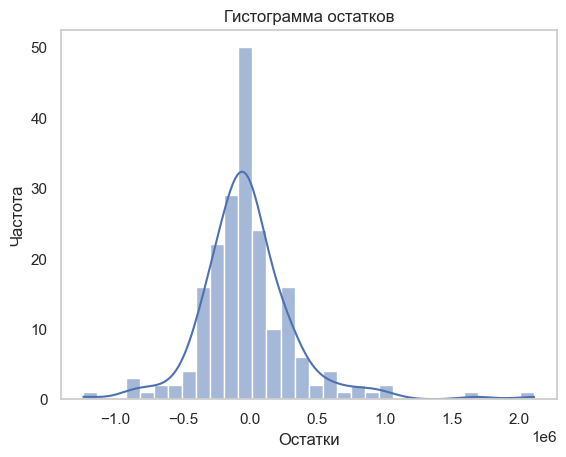

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление остатков
residuals = y_test - y_pred

# Гистограмма остатков
sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

Нормальное распределение остатков

### Q-Q plot

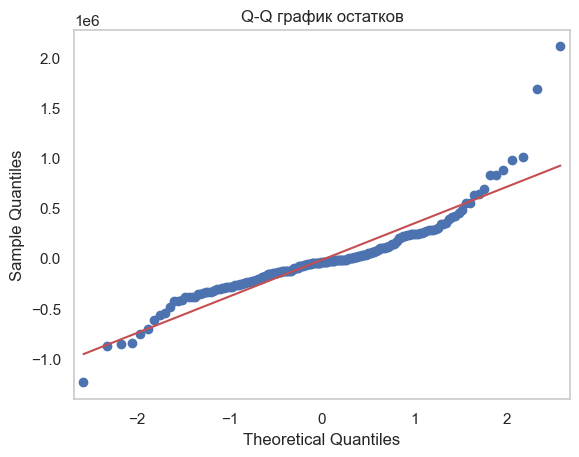

In [410]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Вычисление остатков
residuals = y_test - y_pred

# Q-Q график остатков
fig = plt.figure()
sm.qqplot(residuals, line ='s', ax=fig.add_subplot(111)) # 's' означает стандартную линию
plt.title('Q-Q график остатков')
plt.grid(False)
plt.show()

### Мультиколлинеарность

In [411]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_significant.values, i) for i in range(X_train_significant.shape[1])]
vif["features"] = X_train_significant.columns
print(vif)

   VIF Factor              features
0    2.062417   Watch time(Minutes)
1    1.153760  Stream time(minutes)
2    1.853169          Peak viewers
3    1.615182      Followers gained
4    1.006468        Partnered_True
5   39.511227          Mature_False
6   12.239390           Mature_True
7    1.041264      Language_English


 Mature_False и Mature_True высокая мультиколинеарность

### Фактические Vs предсказанные значения

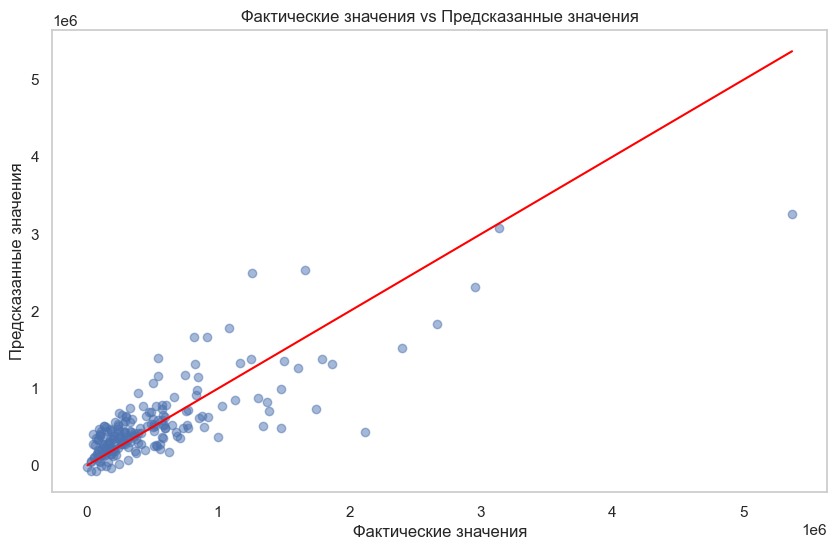

In [412]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Добавление линии идентичности
plt.grid(False)

plt.show()

### Гистограмма остатков

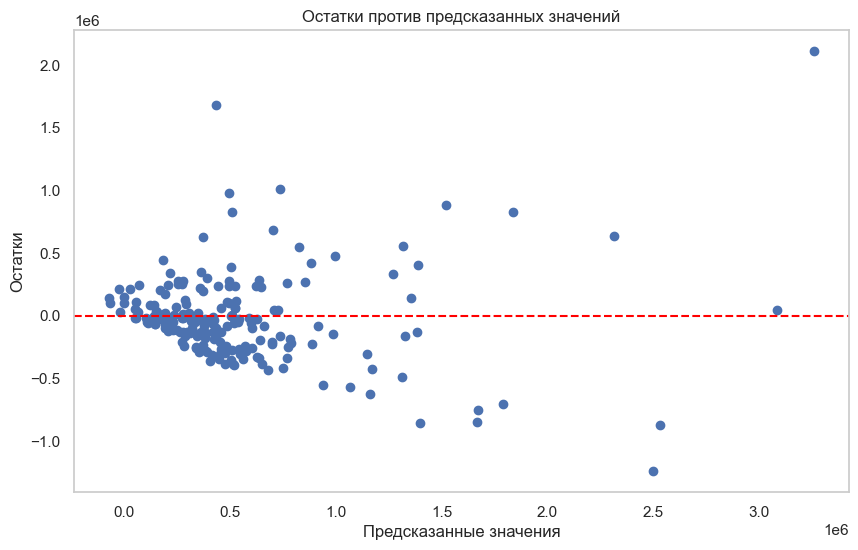

In [413]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.title('Остатки против предсказанных значений')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(False)
plt.show()

дисперсия остатков увеличивается с ростом предсказанных значений => гетероскедастичность

### Интерпретация

In [416]:
results.params

const                   172643.762998
Watch time(Minutes)     234250.464635
Stream time(minutes)    -40280.390904
Peak viewers            115026.935060
Followers gained        385018.127853
Partnered_True          184280.062291
Mature_False            128550.858726
Mature_True              44092.904272
Language_English        235715.665657
dtype: float64

In [421]:
var

[3.017970991432764e+17, 7281806663.6244, 3634177895.9363985, 71393324.6924, 646433785192.3855, 115425790924.57285, 619674715576533.4]

In [423]:
df.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Channel,,,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [429]:
import pandas as pd

# Коэффициенты модели 
model_coefs = pd.Series({
    'Watch time(Minutes)': 234250.464635,
    'Stream time(minutes)': -40280.390904,
    'Peak viewers': 115026.935060,
    'Followers gained': 385018.127853,
})

# Стандартные отклонения признаков 
std_deviations = pd.Series({
    'Watch time(Minutes)': 3.017970991432764e+17**0.5,
    'Stream time(minutes)': 7281806663.6244**0.5,
    'Peak viewers': 3634177895.9363985**0.5,
    'Followers gained': 646433785192.3855**0.5,
})

# Преобразование коэффициентов к исходному масштабу
original_coefs = model_coefs / std_deviations
original_coefs

Watch time(Minutes)     0.000426
Stream time(minutes)   -0.472035
Peak viewers            1.908079
Followers gained        0.478872
dtype: float64

* const                   172643.762998
* Watch time(Minutes)     0.000426
* Stream time(minutes)   -0.472035
* Peak viewers            1.908079
* Followers gained        0.478872
* Partnered_True          184280.062291
* Mature_False            128550.858726
* Mature_True              44092.904272
* Language_English        235715.665657

### Интерпретация
* Базовое количество подписчиков равно 172643 при прочих равных
* С каждой дополнительной минутой просмотра стрима, количество подписчиков возрастает на 0.000426, при прочих равных.
* С каждой дополнительной минутой трансляции стрима, количество подписчиков уменьшается на 0.472035, при прочих равных.
* При увеличение пикового числа зрителей на 1 человека количество подписчиков растет на 1.908079 человека, при прочих равных.
* При увеличении прироста подписчиков на 1, количество подписчиков в среднем увеличивается на 0.5, при прочих равных.
* При наличии партнерства с Twitch количестве подписчиков увеличивается на 184280 , при прочих равных.
* Если целевая аудитория канала взрослые люди, то количество подписчиков увеличивается на 44092, при прочих равных
* Если язык стримера английский, то количество подписчиков увеличивается на 235715, при прочих равных

## Decision Tree

In [440]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint, uniform
import numpy as np
import pandas as pd
import random 

In [473]:
X = stand_df.drop('Followers', axis=1)
y = stand_df['Followers']

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [606]:
param_dist = {
    "max_depth": randint(3, 1000), 
    "min_samples_split": randint(2, 100), 
    "min_samples_leaf": randint(1, 100), 
    "min_weight_fraction_leaf": uniform(0.0, 0.5), #
    "max_features": ["auto", "sqrt", "log2", None] + list(range(1, X_train.shape[1] + 1)), # "auto", "sqrt", "log2", None или число признаков
    "max_leaf_nodes": [None] + list(range(2, 1000)), 
    "min_impurity_decrease": uniform(0.0, 0.1),
    "min_impurity_split": uniform(0.0, 0.1),
    "ccp_alpha": uniform(0.0, 0.1) 
}

def mape_score(model, X, y):
    y_pred = model.predict(X)
    return -np.mean(np.abs((y - y_pred) / y)) * 100

# Инициализация модели
tree = DecisionTreeRegressor()

# Настройка Random Search
tree_cv = RandomizedSearchCV(tree, param_dist, scoring='neg_mean_squared_error', n_iter=50000, cv=5, n_jobs=-1)

# Обучение модели
tree_cv.fit(X_train, y_train)

# Предсказание
y_pred = tree_cv.best_estimator_.predict(X_test)

C:\Users\whati\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


In [488]:
tree_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.040726491297700985, max_depth=323,
                      max_features=23, max_leaf_nodes=488,
                      min_impurity_decrease=0.07104156727685466,
                      min_impurity_split=0.09759841841672526,
                      min_samples_leaf=14, min_samples_split=8,
                      min_weight_fraction_leaf=0.009347748841957049)

### Метрики качества

In [608]:
y_pred = tree_cv.best_estimator_.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя процентная ошибка (MAPE): {mape:.2f}%")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратической ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя процентная ошибка (MAPE): 89.74%
Средняя абсолютная ошибка (MAE): 263679.88
Среднеквадратическая ошибка (MSE): 244842883525.75
Корень из среднеквадратической ошибки (RMSE): 494816.01
Коэффициент детерминации (R^2): 0.37


### Визуализация

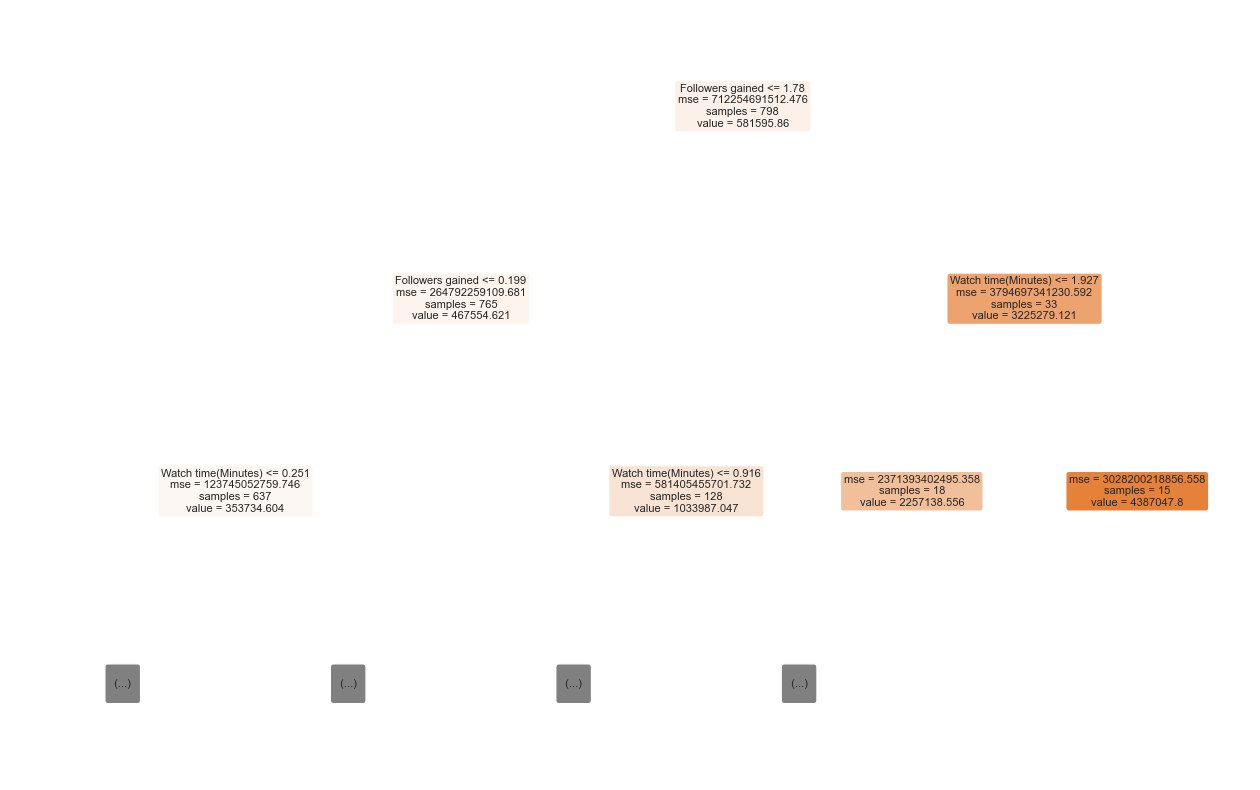

In [496]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_tree = tree_cv.best_estimator_

plt.figure(figsize=(16, 10))

plot_tree(best_tree, 
          filled=True, 
          rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Followers'],
          max_depth=2, 
          fontsize=8)

plt.show()

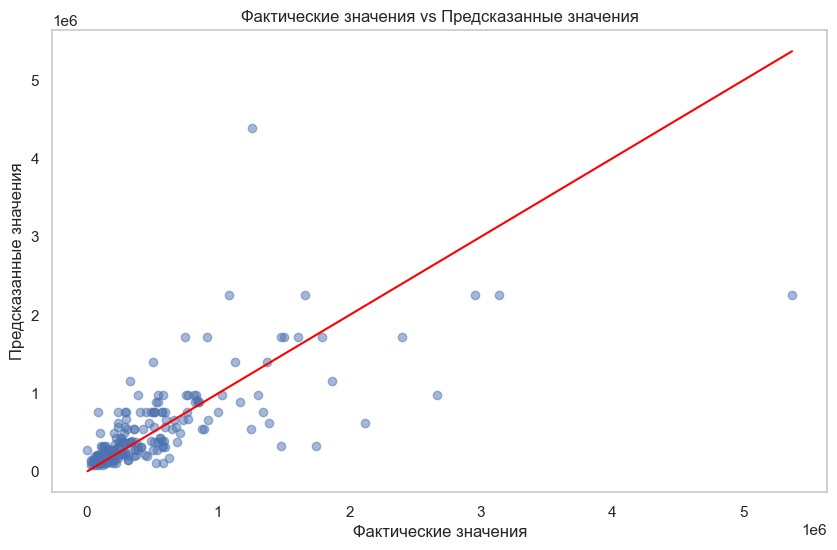

In [501]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Добавление линии идентичности
plt.grid(False)

plt.show()

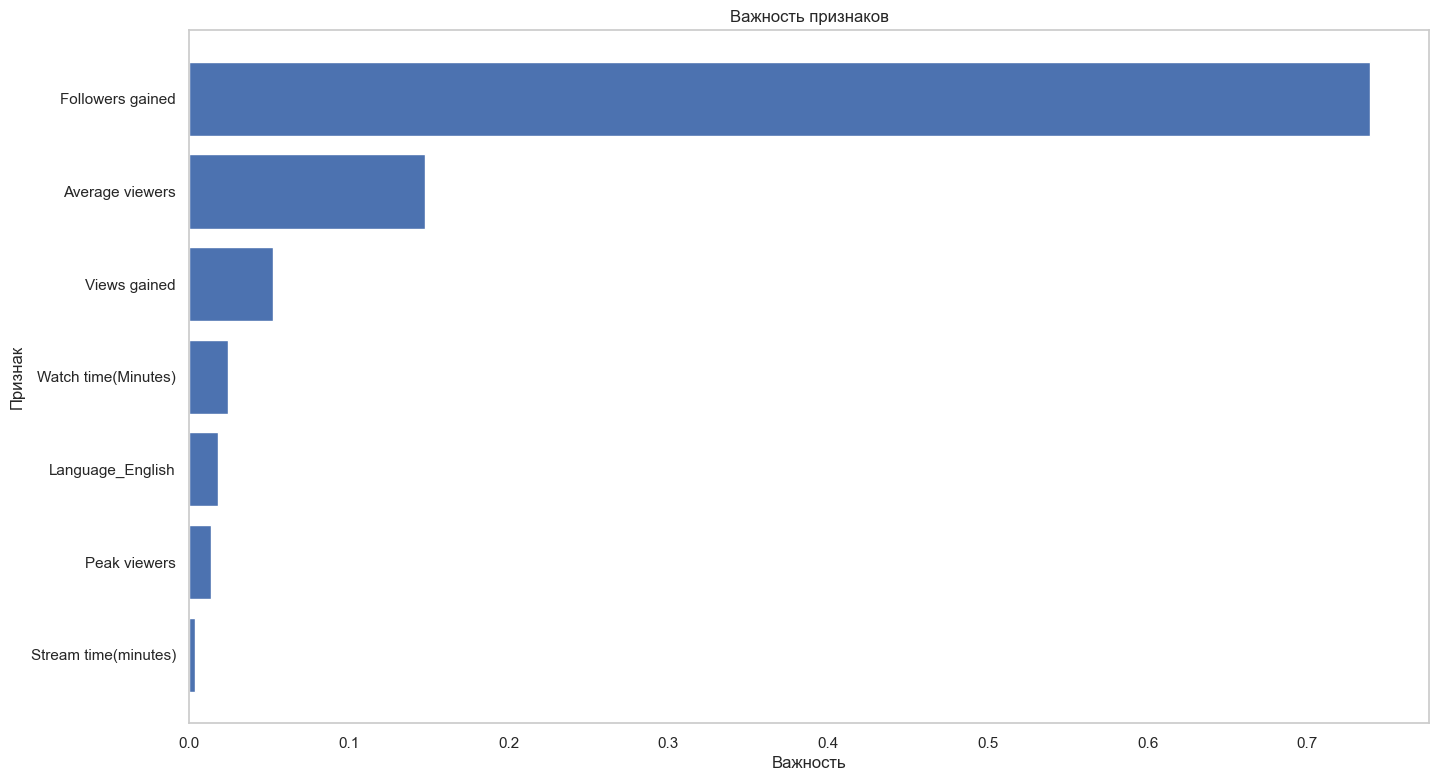

In [534]:
import matplotlib.pyplot as plt
import pandas as pd


best_tree = tree_cv.best_estimator_

feature_importances = best_tree.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)[:7]

plt.figure(figsize=(16, 9))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

### Random Forest

In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import pandas as pd

In [603]:
rf = RandomForestRegressor()

param_dist_rf = {
    "n_estimators": randint(3, 100), 
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 100),
    "min_samples_leaf": randint(1, 100),
    "max_features": ["auto", "sqrt", "log2", None] + list(range(1, X_train.shape[1] + 1)),
    "ccp_alpha": uniform(0.0, 0.1)
}

rf_cv = RandomizedSearchCV(rf, param_dist_rf, scoring='neg_mean_squared_error', n_iter=2000, cv=5, n_jobs=-1, random_state=42)

rf_cv.fit(X_train, y_train)

y_pred_rf = rf_cv.best_estimator_.predict(X_test)

In [543]:
rf_cv.best_estimator_

RandomForestRegressor(ccp_alpha=0.09033360065227053, max_depth=974,
                      max_features=28, min_samples_leaf=11,
                      min_samples_split=21, n_estimators=390)

In [604]:
y_pred = rf_cv.best_estimator_.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Средняя процентная ошибка (MAPE): {mape:.2f}%")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратической ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя процентная ошибка (MAPE): 87.38%
Средняя абсолютная ошибка (MAE): 225634.56
Среднеквадратическая ошибка (MSE): 152723643201.32
Корень из среднеквадратической ошибки (RMSE): 390798.72
Коэффициент детерминации (R^2): 0.61


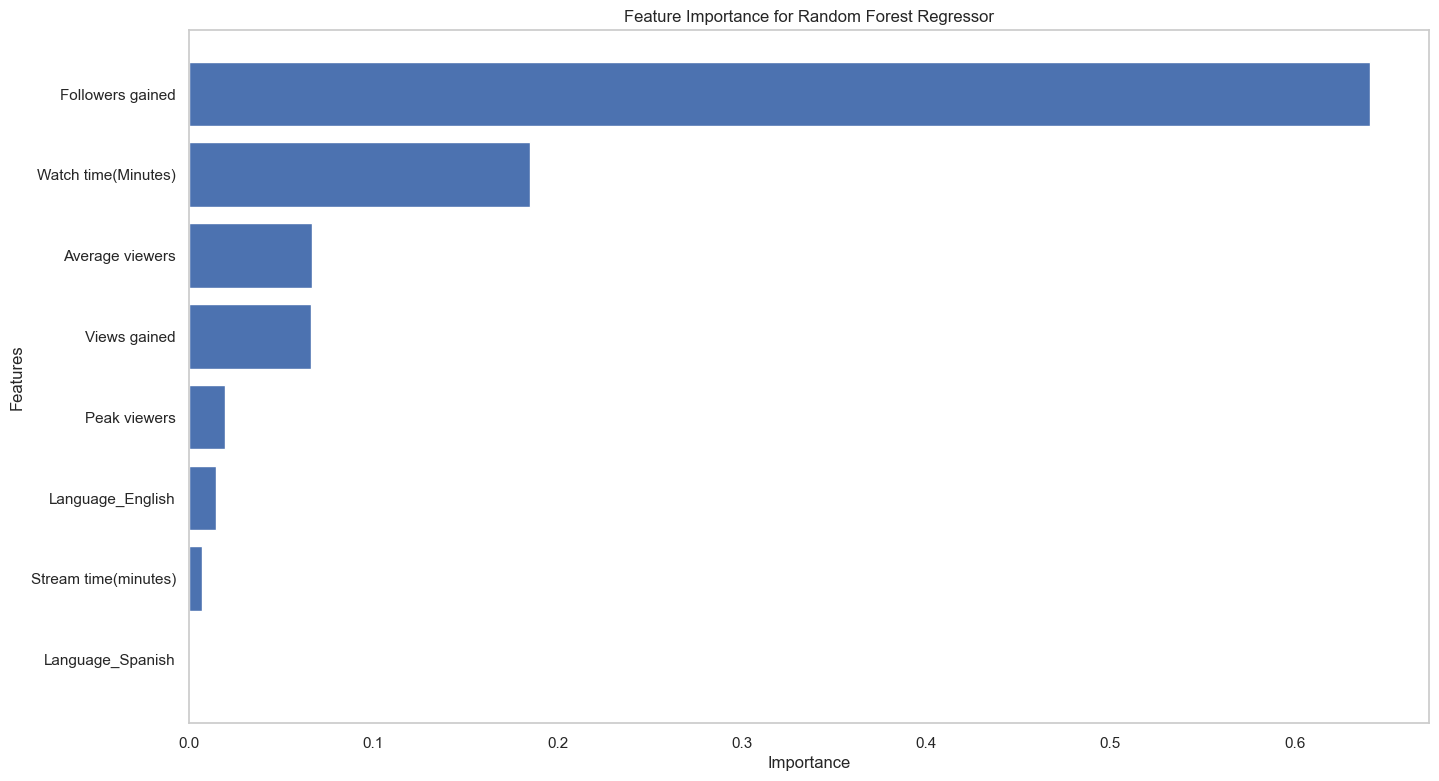

In [545]:
feature_importances_rf = rf_cv.best_estimator_.feature_importances_

features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 9))
plt.barh(features_df_rf['Feature'][:8], features_df_rf['Importance'][:8])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Regressor')
plt.gca().invert_yaxis() 
plt.grid(False)
plt.show()

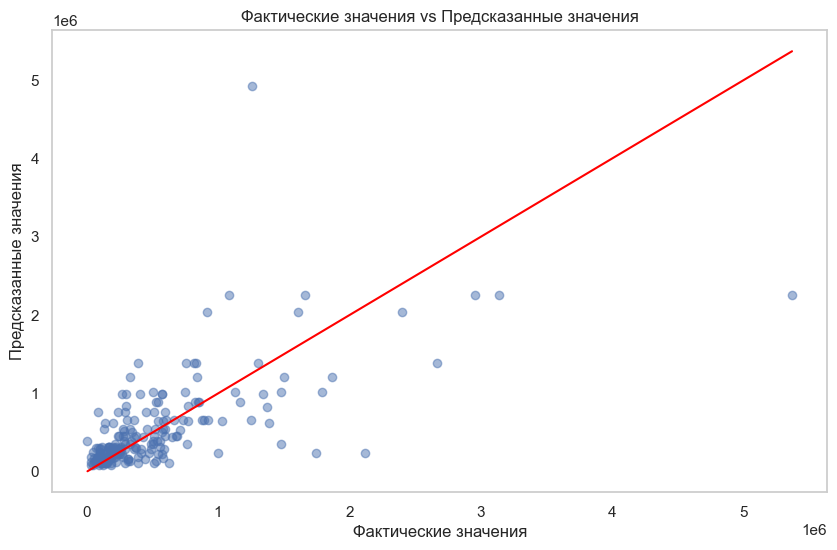

In [551]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.grid(False)

plt.show()

### Gradient Boosting

In [565]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer
import numpy as np

In [581]:
# Функция для вычисления MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)

lgb_rf = lgb.LGBMRegressor()

In [600]:
param_dist_lgb = {
    "n_estimators": randint(100, 200),
    "num_leaves": randint(20, 200),  
    "bagging_fraction": uniform(0.2, 0.5),  
    "feature_fraction": uniform(0.4, 0.6),  
    "max_depth": randint(3, 150)
}

def mape_score(model, X, y):
    y_pred = model.predict(X)
    return -np.mean(np.abs((y - y_pred) / y)) * 100

lgb_cv = RandomizedSearchCV(lgb_rf, param_dist_lgb, scoring='neg_mean_squared_error', n_iter=500, cv=5, n_jobs=-1)

lgb_cv.fit(X_train, y_train)

y_pred_lgb = lgb_cv.best_estimator_.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.8957978414615809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8957978414615809
[LightGBM] [Warning] bagging_fraction is set=0.3604819575543499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3604819575543499
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8957978414615809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8957978414615809
[LightGBM] [Warning] bagging_fraction is set=0.3604819575543499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3604819575543499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 798, number of used features: 16
[LightGBM] [Info] Start trainin

In [602]:
lgb_cv.best_estimator_

LGBMRegressor(bagging_fraction=0.3604819575543499,
              feature_fraction=0.8957978414615809, max_depth=4,
              n_estimators=113, num_leaves=109)

In [601]:
y_pred = lgb_cv.best_estimator_.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя процентная ошибка (MAPE): {mape:.2f}%")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратической ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

[LightGBM] [Warning] feature_fraction is set=0.8957978414615809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8957978414615809
[LightGBM] [Warning] bagging_fraction is set=0.3604819575543499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3604819575543499
Средняя процентная ошибка (MAPE): 78.34%
Средняя абсолютная ошибка (MAE): 242636.99
Среднеквадратическая ошибка (MSE): 169022178602.20
Корень из среднеквадратической ошибки (RMSE): 411123.07
Коэффициент детерминации (R^2): 0.56


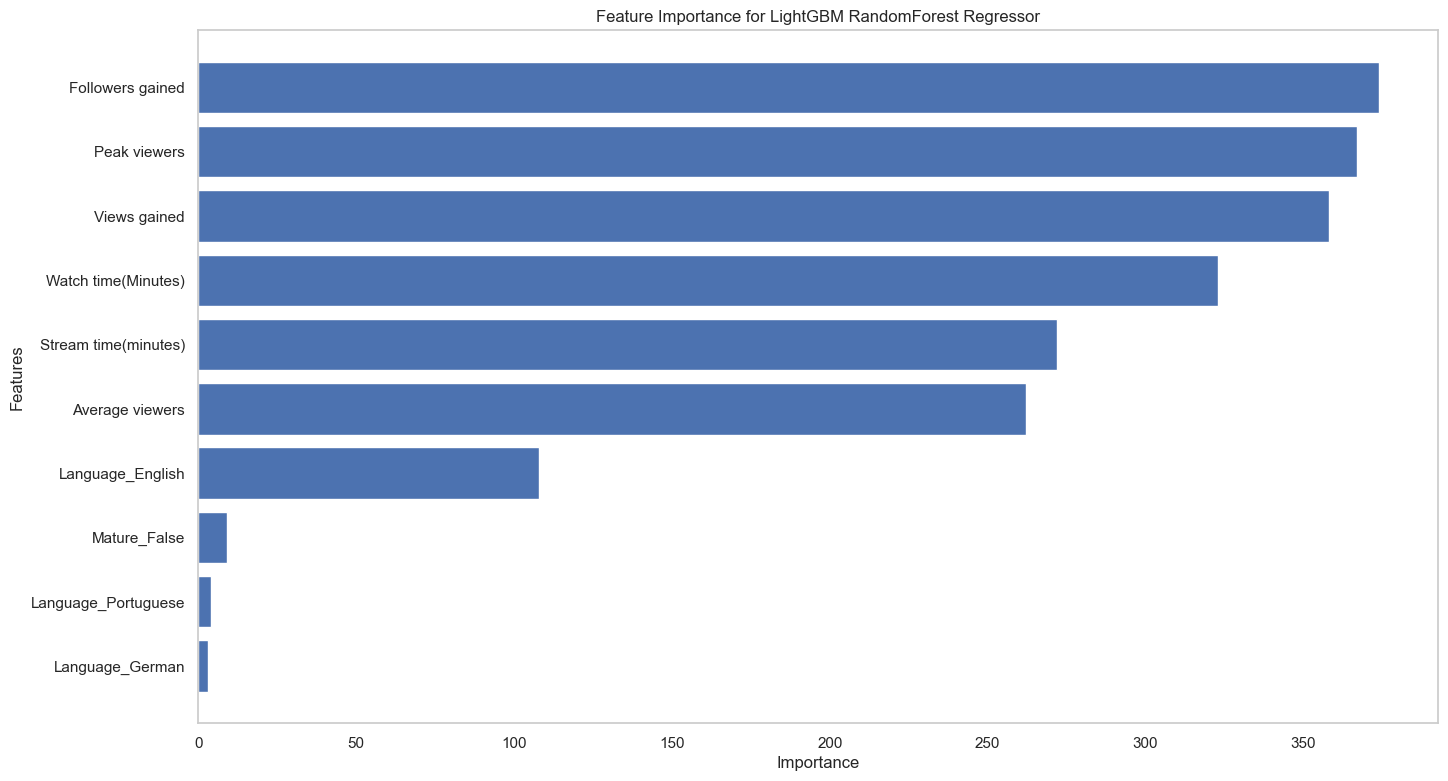

In [573]:
feature_importances_lgb = lgb_cv.best_estimator_.feature_importances_

features_df_lgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_lgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 9))
plt.barh(features_df_lgb['Feature'][:10], features_df_lgb['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for LightGBM RandomForest Regressor')
plt.gca().invert_yaxis() 
plt.grid(False)
plt.show()

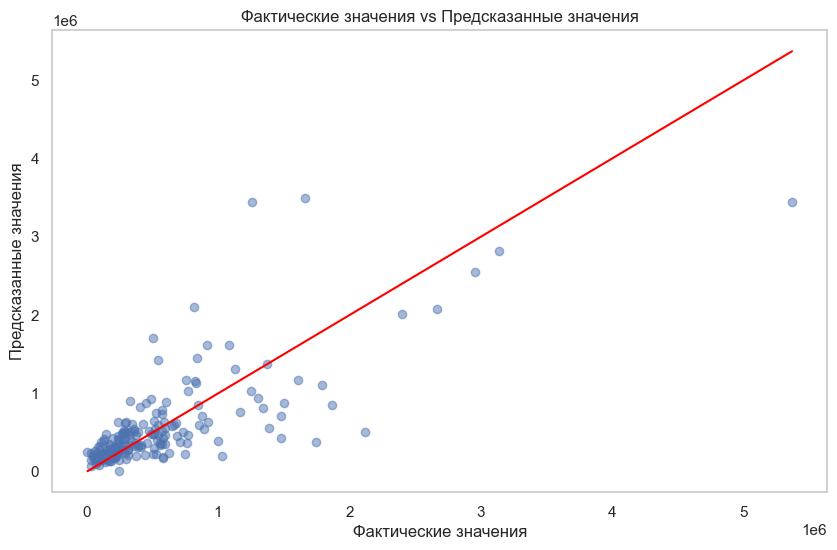

In [598]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Фактические значения vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.grid(False)

plt.show()

## Сравнение результатов

| Модель | MAPE (%) | MAE | MSE | RMSE | R^2 |
|--------|----------|-----|-----|------|-----|
| Линейная регрессия | 75.57 | 237636.17 | 132996024041.03 | 364686.20 | 0.66 |
| Дерево решений | 89.74 | 263679.88 | 244842883525.75 | 494816.01 | 0.37 |
| Случайный лес | 82.28 | 227078.51 | 155746150427.36 | 394646.87 | 0.60 |
| Градиентный бустинг (LightGBM) | 78.34 | 242636.99 | 169022178602.20 | 411123.07 | 0.56 |


### SHAP

In [617]:
import shap
shap.initjs()

In [614]:
explainer = shap.Explainer(lgb_cv.best_estimator_)

shap_values = explainer.shap_values(X_test)

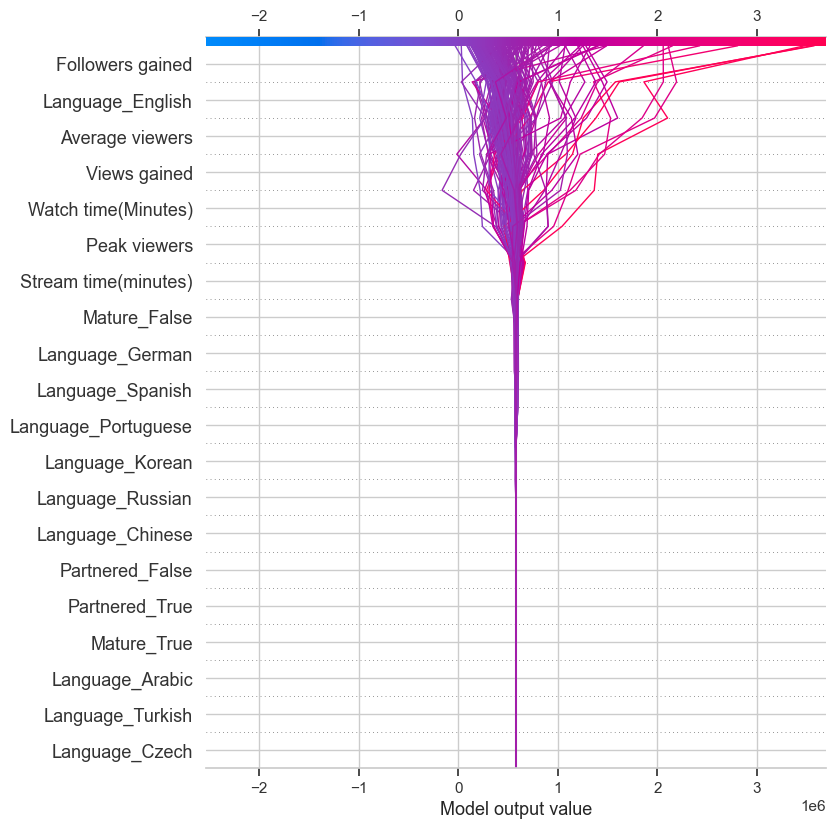

In [621]:
shap.decision_plot(explainer.expected_value, shap_values[:200], X_test.iloc[0])

In [630]:
import dill

In [631]:
filepath = r'C:\Users\whati\OneDrive\Рабочий стол\Jup\Projects_Analytics\regression\session_1reg.db'

In [632]:
dill.dump_session(filepath)

In [ ]:
dill.load_session(filepath)